# Ensembles Analysis

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
# Read data from CSV file into a DataFrame
df = pd.read_csv('rw_data.csv')

In [3]:
print(df['PRE20_mean_median'][0])
print(df['PRE20_efficiency_gap'][0])
print(df['PRE20_partisan_bias'][0])
print(df['cut_edges'][0])

-0.0106376459553084
-0.0360372344270922
-0.0531914893617021
4781


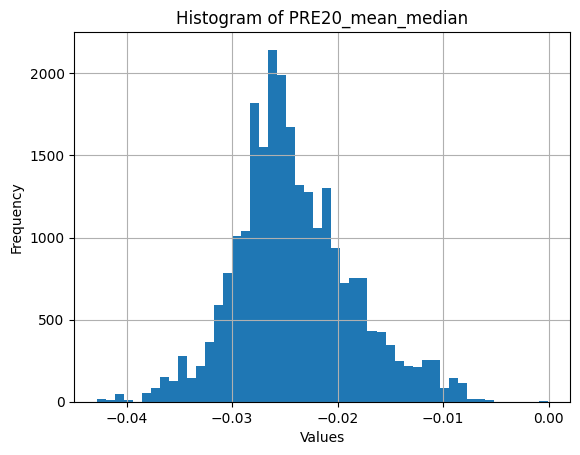

In [4]:
column_name = 'PRE20_mean_median'
df[column_name].hist(bins=50)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(column_name))
plt.grid(True)
plt.show()

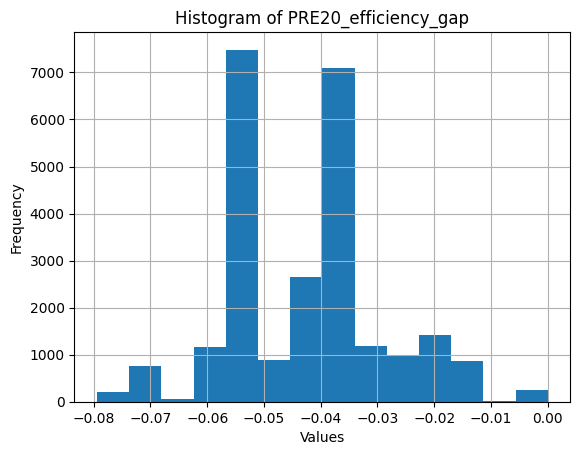

In [5]:
column_name = 'PRE20_efficiency_gap'
df[column_name].hist(bins=14)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(column_name))
plt.grid(True)
plt.show()

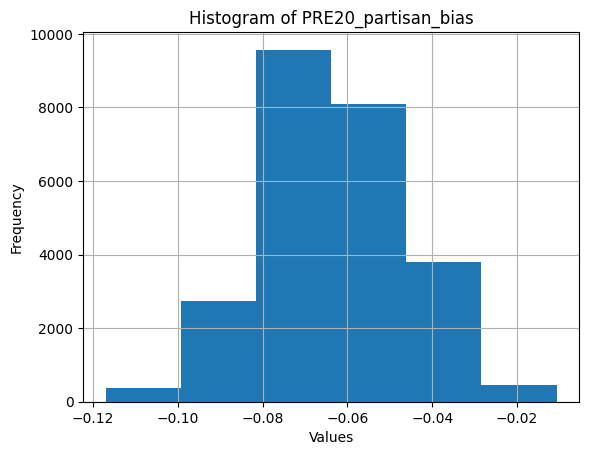

In [6]:
column_name = 'PRE20_partisan_bias'
df[column_name].hist(bins=6)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(column_name))
plt.grid(True)
plt.show()

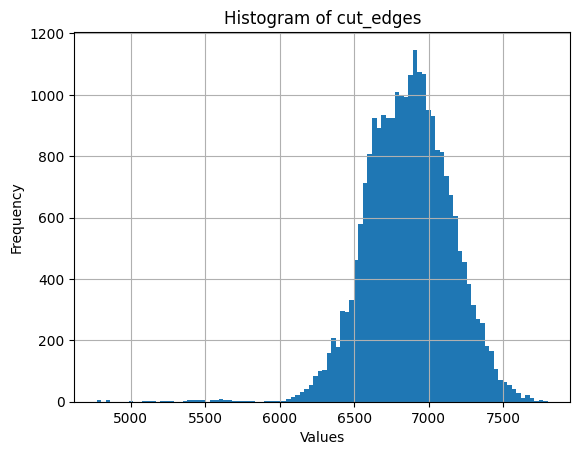

In [7]:
column_name = 'cut_edges'
df[column_name].hist(bins=100)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(column_name))
plt.grid(True)
plt.show()

In [8]:
nat_maj_df = pd.DataFrame()
nat_vap_maj_df = pd.DataFrame()
for i in range (1, 48):
    pop_col = f'population_{i}'
    vap_col = f'voting age population_{i}'
    native_pop_col = f'native population_{i}'
    vap_native_pop_col = f'native voting age population_{i}'

    nat_maj_df[i] = df[native_pop_col] > df[pop_col]*0.5
    nat_vap_maj_df[i] = df[vap_native_pop_col] > df[vap_col]*0.5

nat_maj_df['Maj Native American Dist'] = nat_maj_df.sum(axis=1)
nat_vap_maj_df['Maj VAP Native American Dist'] = nat_vap_maj_df.sum(axis=1)

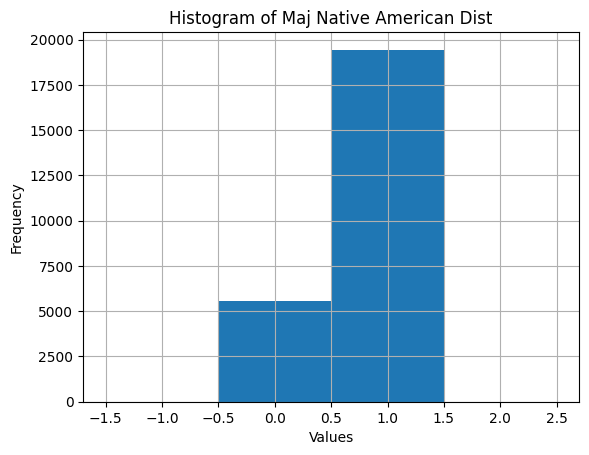

In [9]:
column_name = 'Maj Native American Dist'
nat_maj_df[column_name].hist(bins=range(-1, 4, 1), align='left')  # You can adjust the number of bins as per your preference
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(column_name))
plt.grid(True)
plt.show()

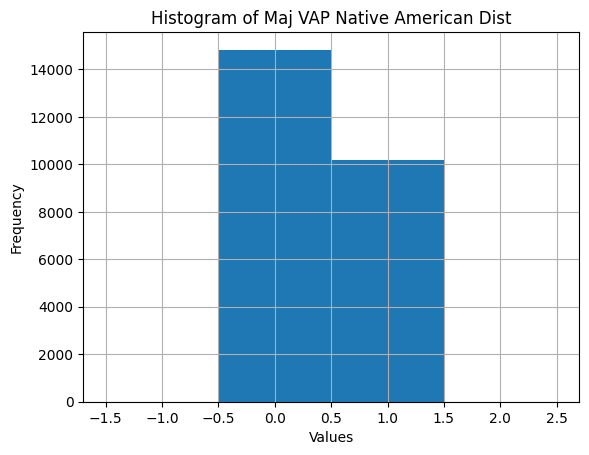

In [10]:
column_name = 'Maj VAP Native American Dist'
nat_vap_maj_df[column_name].hist(bins=range(-1, 4, 1), align='left')  # You can adjust the number of bins as per your preference
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(column_name))
plt.grid(True)
plt.show()

In [39]:
dem_win_df = pd.DataFrame()
for i in range (1, 48):
    pres_dem_col = f'PRE20_Democratic_{i}'
    pres_rep_col = f'PRE20_Republican_{i}'

    dem_win_df[i] = df[pres_dem_col] > df[pres_rep_col]

dem_win_df['Democratic Win Districts'] = dem_win_df.sum(axis=1)

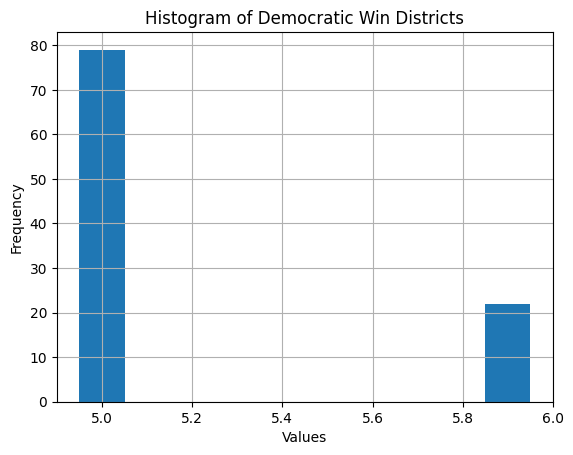

In [43]:
column_name = 'Democratic Win Districts'
dem_win_df[column_name].hist(bins=10, align='left')  # You can adjust the number of bins as per your preference
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(column_name))
plt.grid(True)
plt.show()